In [ ]:
library(CellChat)
library(patchwork)
library(ggvenn)
library(pheatmap)
library(RColorBrewer)
library(ComplexHeatmap)
library(DT)
library(Matrix)
library(circlize)
library(dplyr)
library(stringr)

### 1. read tumor and normal data

In [6]:
tumor <- readRDS('../00.data/Tumor.tpm.Rdata')

In [7]:
normal <- readRDS('../00.data/Normal.tpm.Rdata')

In [8]:
head(tumor)

,9DW0030,9DW0038,9DW0039,9DW0049,9DW0052,9DW0056,9DW0064,9DW0068,9DW0073,9DW0074,⋯,9DW0344,9DW0348,9DW0351,9DW0362,9DW0368,9DW0377,9DW0378,9DW0380,9DW0383,9DW0388
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,6.793832,2.339765,2.931239,12.105895,9.699353,4.508053,2.098166,1.045524,7.960385,1.815963,⋯,2.527701,0.839477,6.534398,2.029366,2.461694,4.510342,4.705178,3.159491,1.937165,2.709262
A1BG-AS1,2.229624,0.693577,0.767752,0.725219,3.026700,1.681083,1.806648,0.518241,4.562893,0.638787,⋯,1.336471,0.588684,1.386972,0.508167,0.562715,2.397408,1.719141,1.208936,0.813533,1.279563
A1CF,0.099166,0.000000,2.930860,7.725161,1.652509,3.330733,0.041193,3.914073,0.012446,0.168411,⋯,4.209980,0.000000,15.530977,0.000000,32.551016,0.035345,0.046124,0.934952,0.022244,0.904858
A2M,618.316979,282.864164,650.704958,27.339350,717.626515,270.008714,314.743489,243.104425,228.524684,138.544962,⋯,352.805683,430.454017,108.834804,786.610700,23.245277,549.354763,567.852384,179.334522,409.965012,431.952125
A2M-AS1,4.312236,3.340083,0.833381,0.115584,2.117325,0.872245,1.379249,0.238519,2.245094,0.342342,⋯,0.558941,6.087254,0.092414,4.584583,0.208061,1.175654,1.255308,0.406795,0.517140,1.345734
A2ML1,0.160812,0.025255,0.053246,0.022994,0.082605,0.042365,0.000000,0.000000,0.000000,0.127251,⋯,1.279669,0.304929,0.000000,0.052580,0.045692,0.054263,0.018082,0.444593,0.000000,0.009245


### 2. read the group info

In [9]:
phe <- readRDS("../00.data/phe_RNA54.Rdata")

In [10]:
highnames <- filter(phe,group == "High") %>% select(sample) %>% .[,1]
lownames <- filter(phe,group == "Low") %>% select(sample) %>% .[,1]
negatives <- filter(phe,group == "negative") %>% select(sample) %>% .[,1]

In [11]:
colnames(tumor) %>% str_replace('X','') %>% paste0(.,'T')  -> colnames(tumor)

In [12]:
colnames(normal) %>% str_replace('X','') %>% paste0(.,'N')  -> colnames(normal)

In [13]:
tumor_normal <- cbind(tumor,normal)

In [14]:
head(tumor_normal)

,9DW0030T,9DW0038T,9DW0039T,9DW0049T,9DW0052T,9DW0056T,9DW0064T,9DW0068T,9DW0073T,9DW0074T,⋯,9DW0344N,9DW0348N,9DW0351N,9DW0362N,9DW0368N,9DW0377N,9DW0378N,9DW0380N,9DW0383N,9DW0388N
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,6.793832,2.339765,2.931239,12.105895,9.699353,4.508053,2.098166,1.045524,7.960385,1.815963,⋯,9.022456,2.449978,2.798060,2.131516,2.639017,1.806114,3.968413,1.225789,2.259904,10.502352
A1BG-AS1,2.229624,0.693577,0.767752,0.725219,3.026700,1.681083,1.806648,0.518241,4.562893,0.638787,⋯,6.594782,1.734597,1.035812,1.118700,3.011669,1.071111,1.950115,0.680602,0.319657,5.330094
A1CF,0.099166,0.000000,2.930860,7.725161,1.652509,3.330733,0.041193,3.914073,0.012446,0.168411,⋯,0.191212,0.004741,0.171431,0.000000,0.079940,0.000000,0.008891,0.000000,0.179105,0.000000
A2M,618.316979,282.864164,650.704958,27.339350,717.626515,270.008714,314.743489,243.104425,228.524684,138.544962,⋯,442.243198,242.621683,60.079430,347.145610,153.669132,430.109186,175.851727,47.573567,79.920630,144.733120
A2M-AS1,4.312236,3.340083,0.833381,0.115584,2.117325,0.872245,1.379249,0.238519,2.245094,0.342342,⋯,1.940707,3.135638,0.377770,4.880282,2.360360,9.801350,1.417181,0.484844,0.590398,2.223325
A2ML1,0.160812,0.025255,0.053246,0.022994,0.082605,0.042365,0.000000,0.000000,0.000000,0.127251,⋯,0.548030,1.410773,0.000000,1.380567,0.495248,0.212106,327.981385,518.859007,0.092619,0.131981


### 3. split the data into High,Low,Neg

In [15]:
tumor_normal %>% colnames() %>% str_replace('T|N','') %in% highnames %>% tumor_normal[,.] -> High_data

In [16]:
tumor_normal %>% colnames() %>% str_replace('T|N','') %in% lownames %>% tumor_normal[,.] -> Low_data

In [17]:
tumor_normal %>% colnames() %>% str_replace('T|N','') %in% negatives %>% tumor_normal[,.] -> Neg_data

### 4. create the labels for High,Low,Neg

In [18]:
High_data %>% colnames() %>% str_detect('T') %>% ifelse('Tumor','Normal') -> Highlabels
Low_data %>% colnames() %>% str_detect('T') %>% ifelse('Tumor','Normal') -> Lowlabels
Neg_data %>% colnames() %>% str_detect('T') %>% ifelse('Tumor','Normal') -> Neglabels

### 5. covert the data into spartse matrix

In [19]:
High_data2 <- Matrix(as.matrix(High_data), sparse = TRUE) 
Low_data2 <- Matrix(as.matrix(Low_data), sparse = TRUE) 
Neg_data2 <- Matrix(as.matrix(Neg_data), sparse = TRUE) 

In [20]:
meta_high <- as.data.frame(Highlabels)
meta_low <- as.data.frame(Lowlabels)
meta_neg <- as.data.frame(Neglabels)

In [21]:
rownames(meta_high) <- colnames(High_data2)
rownames(meta_low) <- colnames(Low_data2)
rownames(meta_neg) <- colnames(Neg_data2)

In [22]:
head(meta_high)

,Highlabels
,<chr>
9DW0073T,Tumor
9DW0076T,Tumor
9DW0079T,Tumor
9DW0126T,Tumor
9DW0169T,Tumor
9DW0192T,Tumor


### 6. create the cellchat object

In [23]:
GCA_Highcellchat <- createCellChat(object = High_data2, meta = meta_high, group.by = "Highlabels")
GCA_Lowcellchat <- createCellChat(object = Low_data2, meta = meta_low, group.by = "Lowlabels")
GCA_Negcellchat <- createCellChat(object = Neg_data2, meta = meta_neg, group.by = "Neglabels")

[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  Normal Tumor 
[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  Normal Tumor 
[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  Normal Tumor 


### 7. select the database for cell chat

In [24]:
CellChatDB <- CellChatDB.human # use CellChatDB.mouse if running on mouse data
CellChatDB.use <- subsetDB(CellChatDB, search = "Secreted Signaling")
#CellChatDB.use <- CellChatDB

In [25]:
GCA_Highcellchat@DB <- CellChatDB.use
GCA_Lowcellchat@DB <- CellChatDB.use
GCA_Negcellchat@DB <- CellChatDB.use

### 8. subset the genes using ligand-receptor database

In [40]:
GCA_Highcellchat <- subsetData(GCA_Highcellchat)
GCA_Lowcellchat <- subsetData(GCA_Lowcellchat)
GCA_Negcellchat <- subsetData(GCA_Negcellchat)

### 9. Identify Over Expressed Genes

In [ ]:
GCA_Highcellchat <- identifyOverExpressedGenes(GCA_Highcellchat)
GCA_Highcellchat <- identifyOverExpressedInteractions(GCA_Highcellchat)

In [42]:
GCA_Highcellchat

An object of class CellChat created from a single dataset 
 22736 genes.
 38 cells. 
CellChat analysis of single cell RNA-seq data! 

In [ ]:
GCA_Lowcellchat <- identifyOverExpressedGenes(GCA_Lowcellchat)
GCA_Lowcellchat <- identifyOverExpressedInteractions(GCA_Lowcellchat)

In [ ]:
GCA_Negcellchat <- identifyOverExpressedGenes(GCA_Negcellchat)
GCA_Negcellchat <- identifyOverExpressedInteractions(GCA_Negcellchat)

### 10. calculate the communication between ligand and receptor

In [45]:
GCA_Highcellchat <- computeCommunProb(GCA_Highcellchat)
GCA_Highcellchat <- filterCommunication(GCA_Highcellchat, min.cells = 5)
GCA_Highcellchat <- computeCommunProbPathway(GCA_Highcellchat)
GCA_Highcellchat <- aggregateNet(GCA_Highcellchat)

triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2023-12-12 10:16:31]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2023-12-12 10:17:39]"


In [46]:
GCA_Lowcellchat <- computeCommunProb(GCA_Lowcellchat)
GCA_Lowcellchat <- filterCommunication(GCA_Lowcellchat, min.cells = 5)
GCA_Lowcellchat <- computeCommunProbPathway(GCA_Lowcellchat)
GCA_Lowcellchat <- aggregateNet(GCA_Lowcellchat)

triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2023-12-12 10:17:39]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2023-12-12 10:19:34]"


In [47]:
GCA_Negcellchat <- computeCommunProb(GCA_Negcellchat)
GCA_Negcellchat <- filterCommunication(GCA_Negcellchat, min.cells = 5)
GCA_Negcellchat <- computeCommunProbPathway(GCA_Negcellchat)
GCA_Negcellchat <- aggregateNet(GCA_Negcellchat)

triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2023-12-12 10:19:35]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2023-12-12 10:20:53]"


### 11. calculate the centrality for netAnalysis_signalingRole_heatmap

In [48]:
GCA_Highcellchat <- netAnalysis_computeCentrality(GCA_Highcellchat, slot.name = "netP") 

In [49]:
GCA_Lowcellchat <- netAnalysis_computeCentrality(GCA_Lowcellchat, slot.name = "netP") 

In [50]:
GCA_Negcellchat <- netAnalysis_computeCentrality(GCA_Negcellchat, slot.name = "netP") 

### 12. extract the ligand-receptors which were identified in each group

In [51]:
High.net <- subsetCommunication(GCA_Highcellchat)
Low.net <- subsetCommunication(GCA_Lowcellchat)
Neg.net <- subsetCommunication(GCA_Negcellchat)

### 13. heatmap of ongoing and incoming ligand-receptors for high group

In [69]:
Highsignaling = signaling = c("TGFFb","EGF","WNT","CCL","OSM","BMP","LIFR","AGT","IL1","NRG","IL6","GDF",
                             "MSTN","PMCH","EDA","BRADYKININ")
#High.net$pathway_name %in% Highsignaling %>% ifelse(.,FALSE,TRUE) %>% High.net[.,] %>% 
#                                    select(pathway_name) %>% .[,1] %>% unique()  -> Highsignaling_self

In [70]:
#ht1_self <- netAnalysis_signalingRole_heatmap2(GCA_Highcellchat, signaling = Highsignaling_self, 
#                                         pattern = "outgoing")
#ht2_self <- netAnalysis_signalingRole_heatmap2(GCA_Highcellchat,signaling = Highsignaling_self,
#                                         pattern = "incoming")

In [59]:
high_ht1 <- netAnalysis_signalingRole_heatmap2(GCA_Highcellchat, signaling = Highsignaling, 
                                         pattern = "outgoing")
High_ht2 <- netAnalysis_signalingRole_heatmap2(GCA_Highcellchat,signaling = Highsignaling,
                                         pattern = "incoming")

In [60]:
### show all pathway

In [61]:
high_all_in <- netAnalysis_signalingRole_heatmap2(GCA_Highcellchat, pattern = "incoming")
high_all_out = netAnalysis_signalingRole_heatmap2(GCA_Highcellchat, pattern = "outgoing")

In [ ]:
options(repr.plot.height=8,repr.plot.width=3)
pheatmap(high_all_in,cluster_rows = F,cluster_cols = F)

In [ ]:
options(repr.plot.height=8,repr.plot.width=3)
pheatmap(high_all_out,cluster_rows = F,cluster_cols = F)

In [73]:
options(repr.plot.height=5,repr.plot.width=3)
pdf(file =  "High_heatmap_Outgoing.pdf",height = 5,width = 3)
pheatmap(high_ht1,cluster_rows = F,,cluster_cols = F,main = "Outgoing",legend = TRUE,
         color = colorRampPalette(c("white", "#13701B"))(50))
dev.off()

png 
  2

In [74]:
options(repr.plot.height=5,repr.plot.width=3)
pdf(file =  "High_heatmap_Incoming.pdf",height = 5,width = 3)
pheatmap(High_ht2,cluster_rows = F,,cluster_cols = F,main = "Incoming",legend = TRUE,
         color = colorRampPalette(c("white", "#13701B"))(50))
dev.off()

png 
  2

In [67]:
#options(repr.plot.height=5,repr.plot.width=3)
#pdf(file =  "High_heatmapself_Ongoing.pdf",height = 5,width = 3)
#pheatmap(ht1_self,cluster_rows = F,,cluster_cols = F,main = "Outgoing",legend = TRUE,
#         color = colorRampPalette(c("white", "#13701B"))(50))
#dev.off()

In [68]:
#options(repr.plot.height=5,repr.plot.width=3)
#pdf(file =  "High_heatmapself_Incoming.pdf",height = 5,width = 3)
#pheatmap(ht2_self,cluster_rows = F,,cluster_cols = F,main = "Incoming",legend = TRUE,
#         color = colorRampPalette(c("white", "#13701B"))(50))
#dev.off()

### 14. heatmap of ongoing and incoming ligand-receptors for Low group

In [82]:
while (!is.null(dev.list()))  dev.off()

In [99]:
Lowsignaling = c("LIFR","OSM","IL6","IL1","AVP","IL10","SOMATOSTATIN","CALCR","IFN-I",
                 "ENHO", "MSTN")
#Low.net$pathway_name %in% Lowsignaling %>% ifelse(.,FALSE,TRUE) %>% Low.net[.,] %>% 
#                                    select(pathway_name) %>% .[,1] %>% unique()  -> Lowsignaling_self

In [100]:
ht1_low <- netAnalysis_signalingRole_heatmap2(GCA_Lowcellchat, Lowsignaling, 
                                         pattern = "outgoing")
ht2_low <- netAnalysis_signalingRole_heatmap2(GCA_Lowcellchat, Lowsignaling, 
                                         pattern = "incoming")

In [75]:
lowallin= netAnalysis_signalingRole_heatmap2(GCA_Lowcellchat, pattern = "outgoing")

In [76]:
lowallout= netAnalysis_signalingRole_heatmap2(GCA_Lowcellchat, pattern = "incoming")

In [ ]:
options(repr.plot.height=7,repr.plot.width=3)
pheatmap(lowallin,cluster_rows = F,cluster_cols = F)

In [ ]:
options(repr.plot.height=7,repr.plot.width=3)
pheatmap(lowallout,cluster_rows = F,cluster_cols = F)

In [103]:
options(repr.plot.height=5,repr.plot.width=3)
pdf(file =  "Low_heatmap_Outgoing.pdf",height = 5,width = 3)
pheatmap(ht1_low,cluster_rows = F,,cluster_cols = F,main = "Outgoing",legend = TRUE,
         color = colorRampPalette(c("white", "#13701B"))(50))
dev.off()

png 
  2

In [104]:
options(repr.plot.height=5,repr.plot.width=3)
pdf(file =  "Low_heatmap_Incoming.pdf",height = 5,width = 3)
pheatmap(ht2_low,cluster_rows = F,,cluster_cols = F,main = "Incoming",legend = TRUE,
         color = colorRampPalette(c("white", "#13701B"))(50))
dev.off()

png 
  2

In [121]:
#options(repr.plot.height=5,repr.plot.width=3)
#pdf(file =  "Low_heatmapself_ongoing.pdf",height = 8,width = 3)
#pheatmap(ht1_low_self,cluster_rows = F,,cluster_cols = F,main = "Outgoing",legend = TRUE,
#         color = colorRampPalette(c("white", "#13701B"))(50))
#dev.off()

png 
  2

In [122]:
#options(repr.plot.height=5,repr.plot.width=3)
#pdf(file =  "Low_heatmapself_Incoming.pdf",height = 8,width = 3)
#pheatmap(ht2_low_self,cluster_rows = F,,cluster_cols = F,main = "Incoming",legend = TRUE,
#         color = colorRampPalette(c("white", "#13701B"))(50))
#dev.off()

png 
  2

### 15. heatmap of ongoing and incoming ligand-receptors for Neg group

In [119]:
Negsignaling = c("ACTIVIN","LIFR","GDF","NODAL","IL10","NRG","IFN-I","ENHO","SEMA3","BMP","CALCR")
#Neg.net$pathway_name %in% Negsignaling %>% ifelse(.,FALSE,TRUE) %>% Neg.net[.,] %>% 
#                                    select(pathway_name) %>% .[,1] %>% unique()  -> Negsignaling_self

In [120]:
ht1_neg <- netAnalysis_signalingRole_heatmap2(GCA_Negcellchat,Negsignaling, pattern = "outgoing")
ht2_neg <- netAnalysis_signalingRole_heatmap2(GCA_Negcellchat,signaling = Negsignaling, pattern = "incoming")

In [128]:
#ht1_neg_self <- netAnalysis_signalingRole_heatmap2(GCA_Negcellchat,Negsignaling_self, pattern = "outgoing")
#ht2_neg_self <- netAnalysis_signalingRole_heatmap2(GCA_Negcellchat,signaling = Negsignaling_self, pattern = "incoming")

In [111]:
neg_in= netAnalysis_signalingRole_heatmap2(GCA_Negcellchat, pattern = "outgoing")
neg_out= netAnalysis_signalingRole_heatmap2(GCA_Negcellchat, pattern = "incoming")

In [ ]:
options(repr.plot.height=9,repr.plot.width=3)
pheatmap(neg_in,cluster_rows = F,cluster_cols = F)

In [ ]:
options(repr.plot.height=9,repr.plot.width=3)
pheatmap(neg_out,cluster_rows = F,cluster_cols = F)

In [123]:
options(repr.plot.height=5,repr.plot.width=3)
pdf(file =  "Neg_heatmap_ongoing.pdf",height = 5,width = 3)
pheatmap(ht1_neg,cluster_rows = F,,cluster_cols = F,main = "Outgoing",legend = TRUE,
         color = colorRampPalette(c("white", "#13701B"))(50))
dev.off()

png 
  2

In [125]:
options(repr.plot.height=5,repr.plot.width=3)
pdf(file =  "Neg_heatmap_Incoming.pdf",height = 5,width = 3)
pheatmap(ht2_neg,cluster_rows = F,,cluster_cols = F,main = "Incoming",legend = TRUE,
         color = colorRampPalette(c("white", "#13701B"))(50))
dev.off()

png 
  2

In [91]:
#options(repr.plot.height=8,repr.plot.width=3)
#pdf(file =  "Neg_heatmapself_ongoing.pdf",height = 8,width = 3)
#pheatmap(ht1_neg_self,cluster_rows = F,,cluster_cols = F,main = "Outgoing",legend = TRUE,
#         color = colorRampPalette(c("white", "#13701B"))(50))
#dev.off()

png 
  2

In [92]:
#options(repr.plot.height=8,repr.plot.width=3)
#pdf(file =  "Neg_heatmapself_Incoming.pdf",height = 8,width = 3)
#pheatmap(ht2_neg_self,cluster_rows = F,,cluster_cols = F,main = "Incoming",legend = TRUE,
#         color = colorRampPalette(c("white", "#13701B"))(50))
#dev.off()

png 
  2

### 16. Vennplot of ongoing and incoming ligand-receptors

In [126]:
options(repr.plot.height=6,repr.plot.width=8)
x <- list(Neg=rownames(ht2_neg), Low=rownames(ht2_low),High=rownames(High_ht2))
p_v = ggvenn(x, show_elements = T, label_sep = "\n", fill_color = brewer.pal(name="Set2",n=3))

In [127]:
pdf(file = "venn.pdf",width = 8,height = 8)
p_v
dev.off()

png 
  2

In [95]:
options(repr.plot.height=6,repr.plot.width=8)
x <- list(Neg=rownames(ht2_neg_self), Low=rownames(ht2_low_self),High=rownames(ht1_self))
p_v2 = ggvenn(x, show_elements = T, label_sep = "\n", fill_color = brewer.pal(name="Set2",n=3),
              text_size = 1)

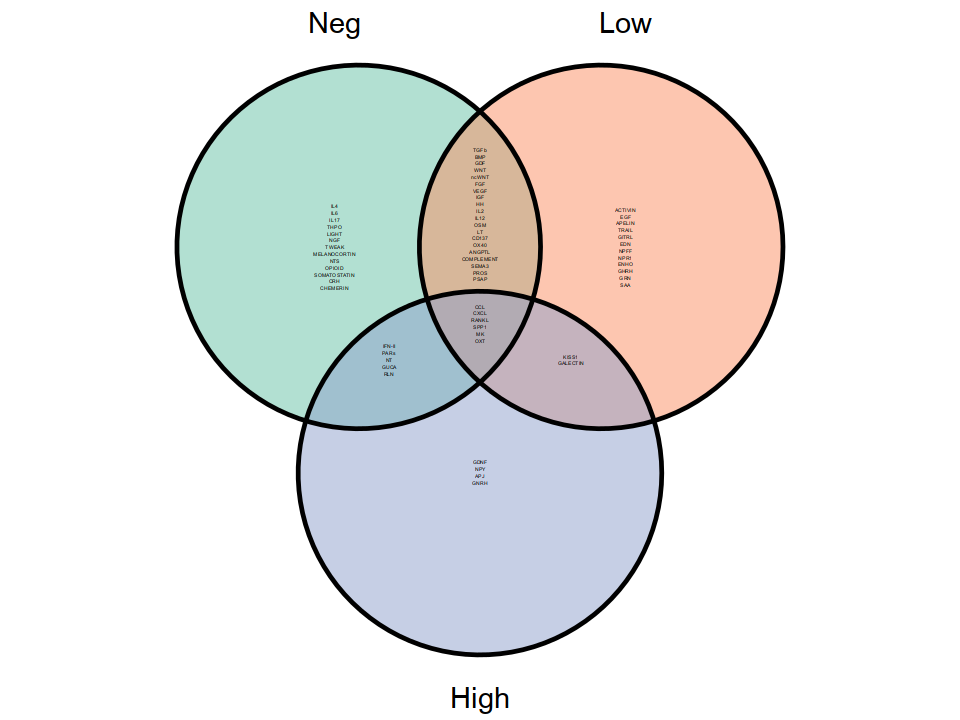

In [96]:
p_v2

In [97]:
ggsave(filename = "Paracrine_Venn.pdf",plot = p_v,height = 6,width = 6)
#ggsave(filename = "Autocrine_Venn.pdf",plot = p_v2,height = 6,width = 6)

## Plot all circos for High,Low,Neg

In [128]:
ht1_low

,Normal,Tumor
LIFR,0,1
OSM,0,1
IL6,0,1
IL1,0,1
AVP,0,1
IL10,1,0
SOMATOSTATIN,1,0
CALCR,1,0
IFN-I,1,0
ENHO,1,0


In [ ]:
for(name in rownames(ht1_low)){
    
    pdf(file = paste0("GCA_low_",name,".pdf"),width = 6,height = 6)
    netVisual_chord_gene2(GCA_Lowcellchat,title.name = name,color.use = c("#377EB8","#E41A1C"),
                    signaling = name, lab.cex = 1, small.gap = 3.5)
    dev.off()
}

In [ ]:
for(name in rownames(high_ht1)){
    
    pdf(file = paste0("GCA_high_",name,".pdf"),width = 6,height = 6)
    netVisual_chord_gene2(GCA_Highcellchat,title.name = name,color.use = c("#377EB8","#E41A1C"),
                    signaling = name, lab.cex = 1, small.gap = 3.5)
    dev.off()
}

In [ ]:
for(name in rownames(ht1_neg)){
    
    pdf(file = paste0("GCA_neg_",name,".pdf"),width = 6,height = 6)
    netVisual_chord_gene2(GCA_Negcellchat,title.name = name,color.use = c("#377EB8","#E41A1C"),
                    signaling = name, lab.cex = 1, small.gap = 3.5)
    dev.off()
}

In [ ]:
pdf(file = paste0("GCA_low_","NGR",".pdf"),width = 6,height = 6)
netVisual_chord_gene2(GCA_Lowcellchat,title.name = "NRG",color.use = c("#377EB8","#E41A1C"),
                signaling = 'NRG', lab.cex = 1, small.gap = 3.5)
dev.off()

## Customized function

In [57]:
netAnalysis_signalingRole_heatmap2 <- function(object, signaling = NULL, pattern = c("outgoing", "incoming","all"), slot.name = "netP",
                                              color.use = NULL, color.heatmap = "BuGn",
                                              title = NULL, width = 10, height = 8, font.size = 8, font.size.title = 10, cluster.rows = FALSE, cluster.cols = FALSE){
  pattern <- match.arg(pattern)
  if (length(slot(object, slot.name)$centr) == 0) {
    stop("Please run `netAnalysis_computeCentrality` to compute the network centrality scores! ")
  }
  centr <- slot(object, slot.name)$centr
  outgoing <- matrix(0, nrow = nlevels(object@idents), ncol = length(centr))
  incoming <- matrix(0, nrow = nlevels(object@idents), ncol = length(centr))
  dimnames(outgoing) <- list(levels(object@idents), names(centr))
  dimnames(incoming) <- dimnames(outgoing)
  for (i in 1:length(centr)) {
    outgoing[,i] <- centr[[i]]$outdeg
    incoming[,i] <- centr[[i]]$indeg
  }
  if (pattern == "outgoing") {
    mat <- t(outgoing)
    legend.name <- "Outgoing"
  } else if (pattern == "incoming") {
    mat <- t(incoming)
    legend.name <- "Incoming"
  } else if (pattern == "all") {
    mat <- t(outgoing+ incoming)
    legend.name <- "Overall"
  }
  if (is.null(title)) {
    title <- paste0(legend.name, " signaling patterns")
  } else {
    title <- paste0(paste0(legend.name, " signaling patterns"), " - ",title)
  }

  if (!is.null(signaling)) {
    mat1 <- mat[rownames(mat) %in% signaling, , drop = FALSE]
    mat <- matrix(0, nrow = length(signaling), ncol = ncol(mat))
    idx <- match(rownames(mat1), signaling)
    mat[idx[!is.na(idx)], ] <- mat1
    dimnames(mat) <- list(signaling, colnames(mat1))
  }
  mat.ori <- mat
  mat <- sweep(mat, 1L, apply(mat, 1, max), '/', check.margin = FALSE)
  mat[mat == 0] <- NA


  if (is.null(color.use)) {
    color.use <- scPalette(length(colnames(mat)))
  }
  color.heatmap.use = grDevices::colorRampPalette((RColorBrewer::brewer.pal(n = 9, name = color.heatmap)))(100)

  df<- data.frame(group = colnames(mat)); rownames(df) <- colnames(mat)
  names(color.use) <- colnames(mat)
  col_annotation <- HeatmapAnnotation(df = df, col = list(group = color.use),which = "column",
                                      show_legend = FALSE, show_annotation_name = FALSE,
                                      simple_anno_size = grid::unit(0.2, "cm"))
  ha2 = HeatmapAnnotation(Strength = anno_barplot(colSums(mat.ori), border = FALSE,gp = gpar(fill = color.use, col=color.use)), show_annotation_name = FALSE)

  pSum <- rowSums(mat.ori)
  pSum.original <- pSum
  pSum <- -1/log(pSum)
  pSum[is.na(pSum)] <- 0
  idx1 <- which(is.infinite(pSum) | pSum < 0)
  if (length(idx1) > 0) {
    values.assign <- seq(max(pSum)*1.1, max(pSum)*1.5, length.out = length(idx1))
    position <- sort(pSum.original[idx1], index.return = TRUE)$ix
    pSum[idx1] <- values.assign[match(1:length(idx1), position)]
  }

  ha1 = rowAnnotation(Strength = anno_barplot(pSum, border = FALSE), show_annotation_name = FALSE)

  if (min(mat, na.rm = T) == max(mat, na.rm = T)) {
    legend.break <- max(mat, na.rm = T)
  } else {
    legend.break <- c(round(min(mat, na.rm = T), digits = 1), round(max(mat, na.rm = T), digits = 1))
  }
    mat[is.na(mat)]=0
    return(mat)  
}


In [58]:
netVisual_chord_gene2 <- function (object, slot.name = "net", color.use = NULL, signaling = NULL, 
          pairLR.use = NULL, net = NULL, sources.use = NULL, targets.use = NULL, 
          lab.cex = 0.8, small.gap = 1, big.gap = 10, annotationTrackHeight = c(0.03), 
          link.visible = TRUE, scale = FALSE, directional = 1, link.target.prop = TRUE, 
          reduce = -1, transparency = 0.4, link.border = NA, title.name = NULL, 
          legend.pos.x = 20, legend.pos.y = 20, show.legend = TRUE, 
          thresh = 0.05, ...) 
{
  if (!is.null(pairLR.use)) {
    if (!is.data.frame(pairLR.use)) {
      stop("pairLR.use should be a data frame with a signle column named either 'interaction_name' or 'pathway_name' ")
    }
    else if ("pathway_name" %in% colnames(pairLR.use)) {
      message("slot.name is set to be 'netP' when pairLR.use contains signaling pathways")
      slot.name = "netP"
    }
  }
  if (!is.null(pairLR.use) & !is.null(signaling)) {
    stop("Please do not assign values to 'signaling' when using 'pairLR.use'")
  }
  if (is.null(net)) {
    prob <- slot(object, "net")$prob
    pval <- slot(object, "net")$pval
    prob[pval > thresh] <- 0
    net <- reshape2::melt(prob, value.name = "prob")
    colnames(net)[1:3] <- c("source", "target", "interaction_name")
    pairLR = dplyr::select(object@LR$LRsig, c("interaction_name_2", 
                                              "pathway_name", "ligand", "receptor", "annotation", 
                                              "evidence"))
    idx <- match(net$interaction_name, rownames(pairLR))
    temp <- pairLR[idx, ]
    net <- cbind(net, temp)
  }
  if (!is.null(signaling)) {
    pairLR.use <- data.frame()
    for (i in 1:length(signaling)) {
      pairLR.use.i <- searchPair(signaling = signaling[i], 
                                 pairLR.use = object@LR$LRsig, key = "pathway_name", 
                                 matching.exact = T, pair.only = T)
      pairLR.use <- rbind(pairLR.use, pairLR.use.i)
    }
  }
  if (!is.null(pairLR.use)) {
    if ("interaction_name" %in% colnames(pairLR.use)) {
      net <- subset(net, interaction_name %in% pairLR.use$interaction_name)
    }
    else if ("pathway_name" %in% colnames(pairLR.use)) {
      net <- subset(net, pathway_name %in% as.character(pairLR.use$pathway_name))
    }
  }
  if (slot.name == "netP") {
    net <- dplyr::select(net, c("source", "target", "pathway_name", 
                                "prob"))
    net$source_target <- paste(net$source, net$target, sep = "sourceTotarget")
    net <- net %>% dplyr::group_by(source_target, pathway_name) %>% 
      dplyr::summarize(prob = sum(prob))
    a <- stringr::str_split(net$source_target, "sourceTotarget", 
                            simplify = T)
    net$source <- as.character(a[, 1])
    net$target <- as.character(a[, 2])
    net$ligand <- net$pathway_name
    net$receptor <- " "
  }
  if (!is.null(sources.use)) {
    if (is.numeric(sources.use)) {
      sources.use <- levels(object@idents)[sources.use]
    }
    net <- subset(net, source %in% sources.use)
  }
  else {
    sources.use <- levels(object@idents)
  }
  if (!is.null(targets.use)) {
    if (is.numeric(targets.use)) {
      targets.use <- levels(object@idents)[targets.use]
    }
    net <- subset(net, target %in% targets.use)
  }
  else {
    targets.use <- levels(object@idents)
  }
  df <- subset(net, prob > 0)
  if (nrow(df) == 0) {
    stop("No signaling links are inferred! ")
  }
  if (length(unique(net$ligand)) == 1) {
    message("You may try the function `netVisual_chord_cell` for visualizing individual signaling pathway")
  }
  df$id <- 1:nrow(df)
  ligand.uni <- unique(df$ligand)
  for (i in 1:length(ligand.uni)) {
    df.i <- df[df$ligand == ligand.uni[i], ]
    source.uni <- unique(df.i$source)
    for (j in 1:length(source.uni)) {
      df.i.j <- df.i[df.i$source == source.uni[j], ]
      df.i.j$ligand <- paste0(df.i.j$ligand, paste(rep(" ", 
                                                       j - 1), collapse = ""))
      df$ligand[df$id %in% df.i.j$id] <- df.i.j$ligand
    }
  }
  receptor.uni <- unique(df$receptor)
  for (i in 1:length(receptor.uni)) {
    df.i <- df[df$receptor == receptor.uni[i], ]
    target.uni <- unique(df.i$target)
    for (j in 1:length(target.uni)) {
      df.i.j <- df.i[df.i$target == target.uni[j], ]
      df.i.j$receptor <- paste0(df.i.j$receptor, paste(rep(" ", 
                                                           j - 1), collapse = ""))
      df$receptor[df$id %in% df.i.j$id] <- df.i.j$receptor
    }
  }
  cell.order.sources <- levels(object@idents)[levels(object@idents) %in% 
                                                sources.use]
  cell.order.targets <- levels(object@idents)[levels(object@idents) %in% 
                                                targets.use]
  df$source <- factor(df$source, levels = cell.order.sources)
  df$target <- factor(df$target, levels = cell.order.targets)
  df.ordered.source <- df[with(df, order(source, -prob)), ]
  df.ordered.target <- df[with(df, order(target, -prob)), ]
  order.source <- unique(df.ordered.source[, c("ligand", "source")])
  order.target <- unique(df.ordered.target[, c("receptor", 
                                               "target")])
  order.sector <- c(order.source$ligand, order.target$receptor)
  if (is.null(color.use)) {
    color.use = scPalette(nlevels(object@idents))
    names(color.use) <- levels(object@idents)
    color.use <- color.use[levels(object@idents) %in% as.character(union(df$source, 
                                                                         df$target))]
  }
  else if (is.null(names(color.use))) {
    names(color.use) <- levels(object@idents)
    color.use <- color.use[levels(object@idents) %in% as.character(union(df$source, 
                                                                         df$target))]
  }
  edge.color <- color.use[as.character(df.ordered.source$source)]
  names(edge.color) <- as.character(df.ordered.source$source)
  grid.col.ligand <- color.use[as.character(order.source$source)]
  names(grid.col.ligand) <- as.character(order.source$source)
  grid.col.receptor <- color.use[as.character(order.target$target)]
  names(grid.col.receptor) <- as.character(order.target$target)
  grid.col <- c(as.character(grid.col.ligand), as.character(grid.col.receptor))
  names(grid.col) <- order.sector
  df.plot <- df.ordered.source[, c("ligand", "receptor", "prob")]
  if (directional == 2) {
    link.arr.type = "triangle"
  }
  else {
    link.arr.type = "big.arrow"
  }
  circos.clear()
  chordDiagram(df.plot, order = order.sector, col = edge.color, 
               grid.col = grid.col, transparency = transparency, link.border = link.border, 
               directional = directional, direction.type = c("diffHeight+arrows"), link.arr.type = link.arr.type, annotationTrack = "grid", 
               annotationTrackHeight = annotationTrackHeight, preAllocateTracks = list(track.height = max(strwidth(order.sector))), 
               small.gap = small.gap, big.gap = big.gap, link.visible = link.visible, 
               scale = scale, link.target.prop = link.target.prop, reduce = reduce, 
               ...)
  col = c("Normal" = "#E41A1C","Tumor" = "#377EB8")
  circos.track(track.index = 1, panel.fun = function(x, y) {
    xlim = get.cell.meta.data("xlim")
    xplot = get.cell.meta.data("xplot")
    ylim = get.cell.meta.data("ylim")
    sector.name = get.cell.meta.data("sector.index")
    circos.text(mean(xlim), ylim[1], sector.name, facing = "clockwise", 
                niceFacing = TRUE, adj = c(0, 0.5), cex = lab.cex)
    
  }, bg.border = NA)
  if (show.legend) {
    lgd <- ComplexHeatmap::Legend(at = names(color.use), 
                                  type = "grid", legend_gp = grid::gpar(fill = color.use), 
                                  title = "Cell State")
    ComplexHeatmap::draw(lgd, x = unit(1, "npc") - unit(legend.pos.x, 
                                                        "mm"), y = unit(legend.pos.y, "mm"), just = c("right", 
                                                                                                      "bottom"))
  }
   title(title.name)
#  circos.clear()
  if (!is.null(title.name)) {
    text(-0, 1.5, title.name, cex = 1)
  }
  gg <- recordPlot()
 # return(gg)
}
  